These commands allow me to install BWA, SAMtools, and BCFtools. BWA allows me to align short DNA reads to a reference genome, using BWT. SAMtools allows me to read, write, sort, and manipulate sequence alignment data in SAM/BAM format. BCFtools allows me to call variants and manipulate VCF files.

In [1]:
!apt install bwa
!apt install samtools
!apt install bcftools

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  liblmdb0 ncbi-data
The following NEW packages will be installed:
  liblmdb0 ncbi-blast+ ncbi-data
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 15.9 MB of archives.
After this operation, 71.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 liblmdb0 amd64 0.9.24-1build2 [47.6 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 ncbi-data all 6.1.20170106+dfsg1-9 [3,519 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 ncbi-blast+ amd64 2.12.0+ds-3build1 [12.3 MB]
Fetched 15.9 MB in 0s (52.9 MB/s)
Selecting previously unselected package liblmdb0:amd64.
(Reading database ... 123632 files and directories currently installed.)
Preparing to unpack .../liblmdb0_0.9.24-1build2_amd64.deb ...
Unpacking liblmdb0:amd64 (0.9.24-1build2) ...
Selec

!gdown allows me to download files. CRISPR.R1.fastq, CRISPR.R2.fastq, and MM10.tar.gz were downloaded respectively.

In [2]:
!gdown 1-96T1PZKA_FQeD_ZK5z9USaHLP3jVdRO
!gdown 1-BXGr3XVGtd9Tx6PCHSp4hepK41GGCTS
!gdown 1a8CP4P5zkzIBiw1EleqJiSwDW0VZcAar

Downloading...
From (original): https://drive.google.com/uc?id=1-96T1PZKA_FQeD_ZK5z9USaHLP3jVdRO
From (redirected): https://drive.google.com/uc?id=1-96T1PZKA_FQeD_ZK5z9USaHLP3jVdRO&confirm=t&uuid=8837f615-0a0a-432c-9b4c-4075db6651fa
To: /content/CRISPR.R1.fastq
100% 2.67G/2.67G [00:43<00:00, 61.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1-BXGr3XVGtd9Tx6PCHSp4hepK41GGCTS
From (redirected): https://drive.google.com/uc?id=1-BXGr3XVGtd9Tx6PCHSp4hepK41GGCTS&confirm=t&uuid=f1a09737-a719-484c-87ef-2e581e0c48a7
To: /content/CRISPR.R2.fastq
100% 2.67G/2.67G [00:27<00:00, 96.9MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1a8CP4P5zkzIBiw1EleqJiSwDW0VZcAar
From (redirected): https://drive.google.com/uc?id=1a8CP4P5zkzIBiw1EleqJiSwDW0VZcAar&confirm=t&uuid=e5981858-a3d6-4448-852d-961b2264e0f0
To: /content/MM10.tar.gz
100% 3.91G/3.91G [01:18<00:00, 50.1MB/s]


!tar allows me to extract data from MM10.tar.gz. -x tells tar to extract files from an archive. -z specifies that the archive is compressed with gzip. -f states that the next argument is the name of the archive file that will be extracted.

In [4]:
!tar -xzf MM10.tar.gz

!bwa index makes an index with the reference genome, which is Mouse.fasta (the path is MM10/Mouse.fasta). -p MM10 specifies that the generated index files should be prefixed with MM10.



In [5]:
!bwa index -p MM10 MM10/Mouse.fasta

[bwa_index] Pack FASTA... 29.76 sec
[bwa_index] Construct BWT for the packed sequence...
[BWTIncCreate] textLength=5451075338, availableWord=395557796
[BWTIncConstructFromPacked] 10 iterations done. 99999994 characters processed.
[BWTIncConstructFromPacked] 20 iterations done. 199999994 characters processed.
[BWTIncConstructFromPacked] 30 iterations done. 299999994 characters processed.
[BWTIncConstructFromPacked] 40 iterations done. 399999994 characters processed.
[BWTIncConstructFromPacked] 50 iterations done. 499999994 characters processed.
[BWTIncConstructFromPacked] 60 iterations done. 599999994 characters processed.
[BWTIncConstructFromPacked] 70 iterations done. 699999994 characters processed.
[BWTIncConstructFromPacked] 80 iterations done. 799999994 characters processed.
[BWTIncConstructFromPacked] 90 iterations done. 899999994 characters processed.
[BWTIncConstructFromPacked] 100 iterations done. 999999994 characters processed.
[BWTIncConstructFromPacked] 110 iterations done. 

!bwa mem aligns both CRISPR FASTQ files to the reference genome which is indexed with the prefix MM10.  "> alignedreads.sam" allows the alignments to be saved in the SAM format to "alignedreads.sam.

In [9]:
!bwa mem MM10 CRISPR.R1.fastq CRISPR.R2.fastq > alignedreads.sam

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 100000 sequences (10000000 bp)...
[M::process] read 100000 sequences (10000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (1, 46782, 0, 0)
[M::mem_pestat] skip orientation FF as there are not enough pairs
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (208, 255, 307)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (10, 505)
[M::mem_pestat] mean and std.dev: (263.49, 57.15)
[M::mem_pestat] low and high boundaries for proper pairs: (1, 604)
[M::mem_pestat] skip orientation RF as there are not enough pairs
[M::mem_pestat] skip orientation RR as there are not enough pairs
[M::mem_process_seqs] Processed 100000 reads in 20.769 CPU sec, 20.916 real sec
[M::process] read 100000 sequences (10000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (0, 47080, 0, 0)
[M::mem_pestat] skip orientati

For the first command, !samtools view converts the alignment SAM file to a binary BAM file. -bS specifies that the input is a SAM file (-S) and the output should be in BAM format (-b). -q 12 filters alignments with mapping quality scores less than 12.

For the second command, !sam tools sort sorts the BAM file by genomic coordinates and outputs the sorted alignments to a new BAM file. -o specifies the output where the file is saved.

In [10]:
!samtools view -bS -q 12 alignedreads.sam > alignedreads.bam
!samtools sort alignedreads.bam -o sortedreads.bam


[bam_sort_core] merging from 8 files and 1 in-memory blocks...


!samtools index creates an index file that allows for faster random access to the data in sortedreads.bam.

In [11]:
!samtools index sortedreads.bam

!bcftools mpileup generates a pileup of sequence data from the sorted BAM file (sortedreads.bam), using the reference genome (MM10/Mouse.fasta). -Ou produces an uncompressed binary output, which is used by bcftools call to call variants. -mv specifies that multiallelic and variant calling takes place and -Oz -o causes the output to be a gzipped VCF file: variants.vcf.gz.

In [18]:
!bcftools mpileup -Ou -f MM10/Mouse.fasta sortedreads.bam | bcftools call -mv -Oz -o variants.vcf.gz

[mpileup] 1 samples in 1 input files
Note: none of --samples-file, --ploidy or --ploidy-file given, assuming all sites are diploid
[mpileup] maximum number of reads per input file set to -d 250


!pip install cyvcf2 installs the cyvcf2 library, which handles VCF files. I then imported pandas and cyvcf2 to use them. vcf_reader reads the vcf file that is specified by vcf_path, allowing me to extract variant information. I then used "with open('output.tsv', 'w') as file:" before a for loop to generate output.tsv. The for loop beneath this command allows me to go over each variant in the VCF file, extracting the chromosome, position, reference allele, alternate allele, quality score, filter status, and genotype. I put these column names into a list, which I used with pd.read_csv to generate a new dataframe titled "df".

In [32]:
!pip install cyvcf2
import cyvcf2 as cyvcf2
import pandas as pd
vcf_path = 'variants.vcf'

vcf_reader = cyvcf2.VCF(vcf_path)

with open('output.tsv', 'w') as file:
    for variant in vcf_reader:
        genotype = variant.gt_types[0]
        data_string = f"{variant.CHROM}\t{variant.POS}\t{variant.ID}\t{variant.REF}\t{','.join(variant.ALT)}\t{variant.QUAL}\t{variant.FILTER}\t{genotype}\n"
        file.write(data_string)
columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'GENOTYPE']
df = pd.read_csv("output.tsv", delimiter = "\t", header=None, names=columns)

I used pandas to create a new dataframe: intendeddf, which I coded to include dataframe lines that contain 9 specified positions on chromosome 2.

This dataframe displays the data of all the intended mutations changed by CRISPR.

In [39]:
intendeddf = df[(df['CHROM'] == 'chr2') & ((df['POS'] == 36937210) | (df['POS'] == 36996899) | (df['POS'] == 85400441) | (df['POS'] == 85776687) | (df['POS'] == 85918029) | (df['POS'] == 86198668) | (df['POS'] == 86236802) | (df['POS'] == 86658391) | (df['POS'] == 87049235))]
intendeddf

,CHROM,POS,REF,ALT,QUAL,GENOTYPE
5109,chr2,36937210,C,T,194.453003,1
5110,chr2,36996899,CTTTTT,CTTTTTT,185.158005,3
6371,chr2,85400441,A,G,228.171005,3
6380,chr2,85776687,T,A,115.749001,1
6386,chr2,85918029,T,C,119.155998,1
6395,chr2,86198668,A,G,228.250000,3
6402,chr2,86236802,CT,CTT,228.218994,3
6426,chr2,86658391,C,CG,174.298996,3
6437,chr2,87049235,G,T,102.330002,3


I used panadas to create a new dataframe: offtargetdf, which I used to exclude the targeted variants from the previous dataframe with "!=".

This dataframe displays the data of all the off-target mutations changed by CRISPR.

In [77]:
offtargetdf = df[(df['CHROM'] != 'chr2') & ((df['POS'] != 36937210) | (df['POS'] != 36996899) | (df['POS'] != 85400441) | (df['POS'] != 85776687) | (df['POS'] != 85918029) | (df['POS'] != 86198668) | (df['POS'] != 86236802) | (df['POS'] != 86658391) | (df['POS'] != 87049235))]
offtargetdf

,CHROM,POS,REF,ALT,QUAL,GENOTYPE
0,chr1,3013991,A,G,11.71720,3
1,chr1,3365726,T,A,6.51248,3
2,chr1,3408880,G,C,5.75677,3
3,chr1,3438070,G,C,3.77660,3
4,chr1,3441381,T,A,7.30814,3
...,...,...,...,...,...,...
56119,chrY,88047416,A,T,5.75677,3
56120,chrY,88533987,G,C,8.99921,3
56121,chrY,88796561,A,T,5.75677,3
56122,chrY,90090135,T,A,5.75677,3


I used groupby with 'CHROM' and 'GENOTYPE' to get the amount of mutations and genotypes per chromosome. As the only genotypes were 1 and 3, heterozygous and homozygous mutations, I didn't have to continue editing the dataframe. I then used reset_index() to stop 'CHROM' from being the index and labelled the new columns 'CHROM', 'GENOTYPE', and 'COUNT' with .columns.

This dataframe groups by chromosome and genotype, showing the amount of different types of genotype mutations per chromosome. 1 means there was a heterozygous mutation and 3 means there was a homozygous mutation.

In [75]:
summary = df.groupby('CHROM')['GENOTYPE'].value_counts()
summary_df = summary.reset_index()
summary_df.columns = ['CHROM', 'GENOTYPE', 'COUNT']
summary

CHROM  GENOTYPE
chr1   3           4098
       1            266
chr10  3           2875
       1            196
chr11  3           2170
       1            209
chr12  3           2376
       1            119
chr13  3           2210
       1            187
chr14  3           2645
       1            184
chr15  3           2242
       1            124
chr16  3           2325
       1            139
chr17  3           1775
       1             99
chr18  3           1869
       1            146
chr19  3           1179
       1            109
chr2   3           3667
       1            336
chr3   3           3486
       1            134
chr4   3           3031
       1            217
chr5   3           3186
       1            180
chr6   3           3216
       1            180
chr7   3           2377
       1            295
chr8   3           2437
       1            113
chr9   3           2275
       1             84
chrX   3           2950
       1            263
chrY   3            151
       1              4
Name: count, dtype: int64

I imported matplotlib so I could use the commands to create a bar graph. I created the labels heterozygous mutation and homozygous mutation and used .groupby to group the summary_df by chromosome and genotype and summed the count values for each chromosome and genotype. unstack() allowed me to reshape the result and create a dataframe suitable for plotting. I then used grouped.plot to plot the data, specifying a bar graph, setting the y label to 'Counts', making the width 0.8, and making the title 'Homozygous and Heterozygous Mutations per Chromosome'. I set the legend with plt.legend using the list of labels created earlier. plt.tight_layout() adjusts the plot layout for better readability, and plt.show() displays the plot.

This plot shows the amount of heterozygous and homozygous mutations in each chromosome in a mouse cell culture that went through CRISPR.

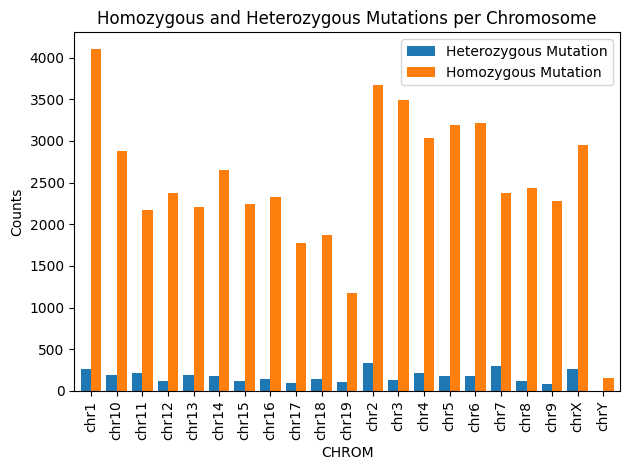

In [74]:
import matplotlib.pyplot as plt
labels = ['Heterozygous Mutation','Homozygous Mutation']
grouped = summary_df.groupby(['CHROM', 'GENOTYPE'])['COUNT'].sum().unstack()
ax = grouped.plot(kind='bar', stacked=False, ylabel='Counts', title='Homozygous and Heterozygous Mutations per Chromosome', width=0.8)
plt.legend(labels=labels)
plt.tight_layout()
plt.show()